# <center> TD Parcours **Data Science** - Machine learning </center>

### <center> Groupe 1 - AVIT // BEELMEON // SOW </center>

Dans ce travail pratique destiné à nous familiariser aux méthodes de Machine Learning, nous allons présenter les Random Forests, une technique qui a connu un gros essort depuis sa mise en place à la fois pour des problématiques de regression et de classification. 

Après avoir brièvement étudié les données à disposition, nous allons travailler avec deux algorithmes d'aggrégation par régression, le random forest et le gradient boosting qui est méthode similaire. 

# Importation des données

Nous allons travailler avec le dataset, présent directement dans le package **caret**, **BloodBrain**. Pour l'exécution sous Python, nous allons importer les 2 objets représentant le dataset au format CSV.



### Importation des librairies 

In [130]:
import pandas as pd # manipulation du dataset 
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation plus poussée 
from sklearn import * # pour les algorithmes de ML
import time as tm

**BloodBrain** contient un dataframe **bbbDescr** de 208 observations et 134 variables, ainsi qu'un vecteur réponse **logBBB** de taille 208. Il est issu des travaux de Mente et Lombardo des laboratoires de R&D du géant américain Pfizer. Ces dernières dans leur  [article](https://link.springer.com/article/10.1007/s10822-005-9001-7) paru en 2005 dans le Journal of Computer-Aided Molecular Design ont développé des modèles qui prédisent le log ratio de la concentration de composés chimiques dans le cerveau et dans le sang.   
On étudie ici le rôle de l'interface sang/encéphale, d'où le nom du jeu de données : Blood Brain Barrier (=BBB). Pour chaque composé chimique sont calculés 3 ensembles de descripteurs moléculaires : **MOE 2D**, **rule-of-five** et **Charge Polar Surface Area**. Le dataframe bbbDescr est donc constitué par les variables explicatives X (il s'agit des features) et le vecteur réponse logBBB est notre variable expliquée (notre target), que l'on souhaite tenter de prédire. Nous sommes donc dans le cadre d'un apprentissage supervisé.  


Afin de mieux appréhender cette problématique et avant toute tentative de prédiction avec les RandomForest, nous allons étudier nos features et target.  


In [45]:
# Tapez vos lignes de commandes ici
data_bbbDescr = pd.read_csv("bb_dataset/data_bbbDescr.csv",sep=';')
data_logBBB = pd.read_csv("bb_dataset/data_logBBB.csv", sep=';')

### Exploration des features et de la target  

In [46]:
df = pd.concat([data_bbbDescr, data_logBBB], axis=1)
df

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3,logBBB
0,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000,1.08
1,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499,-0.40
2,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099,0.22
3,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600,0.14
4,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,32.700001,1,0,233.69200,6,250.362,51.28292,109.50990,13.19232,0.000000,...,1,3,0.8717,0.8717,0.3333,0.000000,3.1150,0.000000,49.692799,-0.02
204,3.240000,0,0,343.24290,10,292.446,40.59702,104.67720,13.19232,0.000000,...,0,1,0.0000,0.0000,0.0000,0.000000,4.6658,0.000000,0.000000,0.08
205,32.340000,1,0,234.79200,6,261.389,75.11627,86.66676,0.00000,8.619013,...,1,2,1.2276,1.2276,0.5000,0.000000,16.1765,54.358601,0.000000,0.25
206,37.299999,0,0,124.25940,0,143.206,63.98079,14.70850,0.00000,0.000000,...,1,2,0.9082,0.9082,0.5000,0.000000,0.0000,30.101400,15.944600,-0.84


Nous constatons qu'il n'y a que des variables continues

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 135 entries, tpsa to logBBB
dtypes: float64(119), int64(16)
memory usage: 219.5 KB


Nous présentons ci-dessous les premières statistiques de notre jeu de données.

In [48]:
df.drop(['logBBB'], axis=1).describe()

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,52.865432,0.365385,0.004808,234.944332,9.706731,310.576481,63.175459,75.774593,14.954809,10.977483,...,-0.043601,1.451923,3.105769,0.898475,0.853881,0.584535,12.541500,10.660027,28.779085,11.576134
std,28.108693,0.482700,0.069338,86.344682,4.847984,93.539020,34.430956,40.134717,17.005926,14.522596,...,0.029395,1.170324,1.447425,0.515849,0.480457,0.591338,18.474987,9.909658,34.620483,16.685970
min,3.240000,0.000000,0.000000,65.442520,0.000000,129.207000,0.000000,0.000000,0.000000,0.000000,...,-0.157800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.829999,0.000000,0.000000,163.876675,6.000000,250.362000,38.729560,40.971247,0.000000,0.000000,...,-0.056950,1.000000,2.000000,0.848975,0.844925,0.200000,0.000000,4.418850,0.000000,0.000000
50%,45.885000,0.000000,0.000000,231.431100,11.000000,303.797500,63.857305,76.571995,9.424675,5.442076,...,-0.039650,1.000000,3.000000,0.925500,0.922900,0.500000,0.000000,7.727450,21.585150,3.291550
75%,72.680000,1.000000,0.000000,300.537775,12.000000,376.891250,84.910122,107.163525,24.869060,17.238030,...,-0.021800,2.000000,4.000000,1.332675,1.228150,0.666700,21.440249,14.812400,49.458375,18.819226
max,166.750000,1.000000,1.000000,492.999700,21.000000,671.863000,149.284300,162.362900,120.050900,94.244530,...,-0.001700,6.000000,7.000000,1.619600,1.618900,3.000000,105.208702,61.979301,151.819901,78.612000


In [22]:
df['logBBB'].describe()

count    208.000000
mean      -0.018894
std        0.779321
min       -2.150000
25%       -0.422500
50%        0.020000
75%        0.530000
max        1.640000
Name: logBBB, dtype: float64

Pour notre variable réponse logBBB, il n'y a pas de valeurs nulles. 

In [36]:
df['logBBB'].isna().value_counts()

False    208
Name: logBBB, dtype: int64


Nous pouvons aussi étudier les potentielles corrélations entre variables. L'étude des corrélations entre variables explicatives est très importante dans une démarche de modélisation et de prédiction. Si une multitude de variables sont corrélées cela induit une redondance dans l'information, ce qui perturbe certains algorithmes prédictifs de base très utilisés comme les régressions.  
Nous utilisons ici la fonction heatmap de seaborn.  

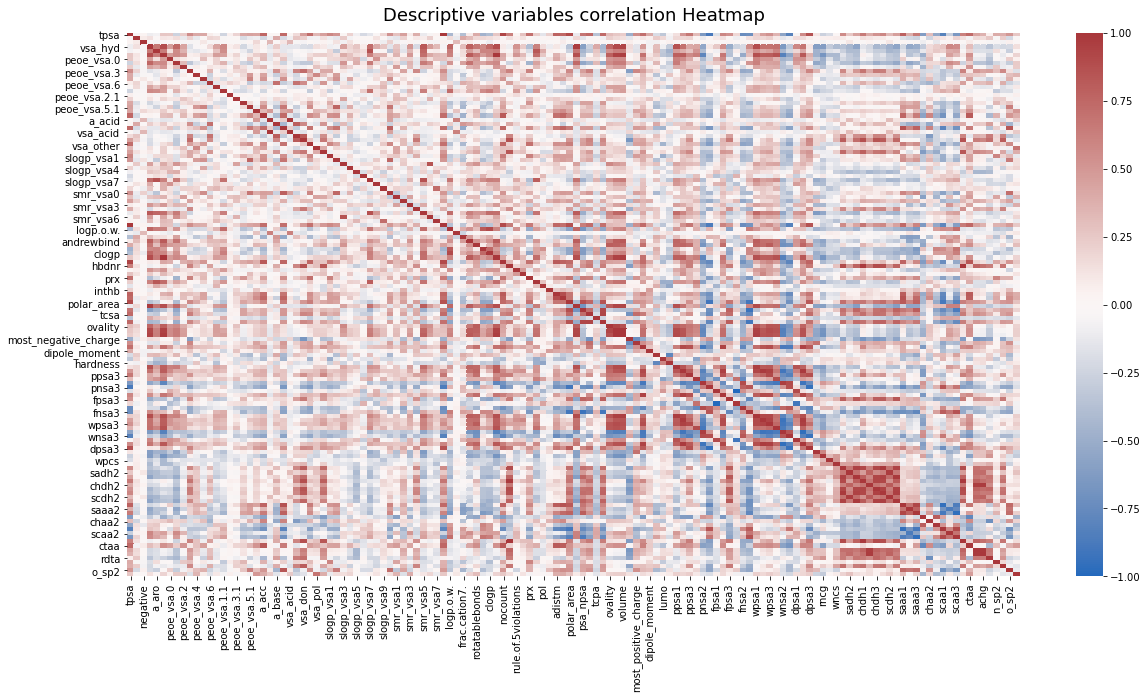

In [57]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.drop(['logBBB'], axis=1).corr(), cmap="vlag")
heatmap.set_title('Descriptive variables correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Le heatmap ci-dessus révèle la présence d'une multitude de corrélations (positives et négatives) dans nos variables explicatives, ce qui était attendu compte tenu du nombre important de variables et du contexte biologique. Selon les méthodes que l'on souhaite utiliser, certains auteurs recommandent d'éliminer les variables beaucoup trop corrélées.  
Dans notre cas, les Random Forest sont une famille de méthodes qui gèrent très efficacement la redondance de l'information, et nous pouvons nous permettre de garder toutes les variables (ce sont les algorithmes de Random Forest eux-mêmes qui vont gérer la redondance).

Nous pouvons observer avec le graph ci-dessous que notre variable réponse suit une loi de densité proche de celle d'une loi normale.

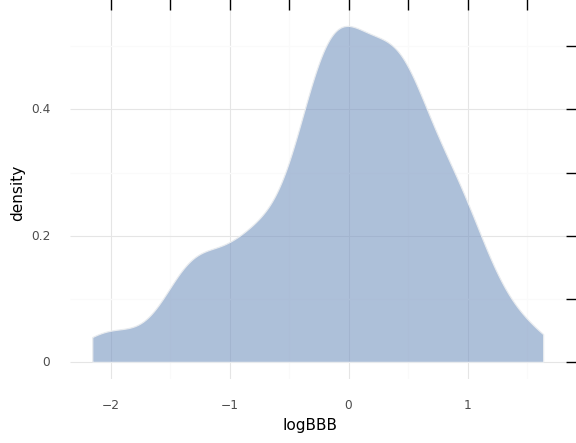

<ggplot: (351754729)>

In [124]:
from plotnine import *
ggplot(df, aes(x="logBBB")) + geom_density(fill="#7896c1", color="#e9ecef", alpha=0.6) + theme_minimal() 

# Famille de méthodes : Random Forest 
## Description de la famille de méthodes



Les méthodes Random Forest découlent directement des arbres de décision.  

Le principe d'un arbre de décision est plutôt simple :  
Celui-ci est constitué de plusieurs noeuds. A chaque noeud, on sélectionne une des variables d'entrées, et selon la valeur de celle-ci, l'individu est envoyé vers un des noeuds suivants. A la fin de la ramification de l'arbre, une classe (s'il s'agit d'une classification) ou une valeur (s'il s'agit d'une régression) est associée à chaque "feuille" de l'arbre.  
L'arbre est créé par apprentissage, c'est à dire qu'un jeu de données d'entraînement permet de construire un arbre efficace sur celui-ci, en prévision d'une utilisation sur un jeu de données à prédire.  
Contrairement à la plupart des autres méthodes de Machine learning, les arbres de décision ont la vertue de ne pas être des boîtes noires : on sait exactement quels sont les critères utilisés pour la classification/régression.  
Malheureusement, en pratique, les arbres de décision sont peu efficaces car peu robustes, fortement soumis au surapprentissage (c'est à dire qu'un arbre pourra donner l'impression de bien fonctionner sur le jeu de données d'entraînement, mais aura des performances médiocres sur le jeu de données à prédire).

Les Random Forest sont un développement visant à contrer ce problèmes :  
Au lieu d'utiliser un seul arbre de décision, on génère de très nombreux arbres de décision, et la prédiction finale est une moyenne des prédictions de tous ces arbres. Pour que les différents arbres de la Forêt soient différents les un des autres (s'ils étaient tous semblables, cela reviendrait à ne pas faire de Random Forest mais juste un arbre de décision), on utilise un bootstrap (rééchantillonnage avec remise) différent pour chacun des arbres, et des contraintes sur les prédicteurs à utiliser sont ajoutées aléatoirement.  
Cette stratégie est payante, et les Random Forest sont des méthodes de prédiction très efficaces et utilisées. On peut en revanche regretter qu'elles perdent du coup l'avantage des arbres de décision de ne pas être des boîtes noires.  

Dans notre approche de modélisation et de prédiction, nous utilisons comme indiqué précédemment le package Scikit-learn. Ce dernier propose une multitude de familles de méthodes de machine learning (de l'ACP à la régression logistique), et de nombreuses sous-méthodes dans chacune de ces familles de méthodes. 

Nous allons ici comparer la méthode de random Forest de référence sur sklearn appelé RandomForestRegressor à une méthode assez similaire appelé GradientBoostingRegressor. 

## Outils dans Python avec la librairie **scikit learn**

La méthode de regression de random Forest ici présentée est équivalente à la méthode rf du package caret de R. Sklearn optimise les hyperparamètres du random forest que sont le nombre d'arbres et le mtry (qui correspond au nombre de variables testées à chaque division). Le gradient boosting est comme le random forest une méthode d'aggrégation. L’idée de base ressemble à celle du bagging. Plutôt que d’utiliser un seul modèle, nous en utilisons plusieurs que nous agrégeons ensuite pour obtenir un seul résultat. Dans  la construction des modèles, le Boosting travaille de manière séquentielle. Il commence par construire un premier modèle qu’il va évaluer. A partir de cette mesure, chaque individu va être pondéré en fonction de la performance de la prédiction. L’objectif est de donner un poids plus important aux individus pour lesquels la valeur a été mal prédite pour la construction du modèle suivant. Le fait de corriger les poids au fur et à mesure permet de mieux prédire les valeurs difficiles. Cet algorithme utilise le gradient de la fonction de perte pour le calcul des poids des individus lors de la construction de chaque nouveau modèle. Cela ressemble un peu à la descente de gradient pour les réseaux de neurones. 

# Mise en oeuvre sous Python


Nous importons à partir de sklearn la fonction de regression RandomForestRegressor ainsi que la fonction de séparation en jeu de données d'entraînement et de teste. 

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Nous séparons en train et test. 

In [74]:
x_train, x_test, y_train, y_test = train_test_split(data_bbbDescr,data_logBBB,test_size=0.2, random_state=69)

Nous lançons nos algorithmes de régression random forest et gradient boosting.

In [160]:
from sklearn.ensemble import RandomForestRegressor

start1 = tm.time()
clf = RandomForestRegressor(max_depth=2, random_state=0)
mod_rf = clf.fit(x_train, y_train)
end1 = tm.time()

mod_rf_speed = end1 - start1

/Users/ibrahimasow/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [161]:
from sklearn.ensemble import GradientBoostingRegressor

start2 = tm.time()
mod_GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(x_train, y_train)
end2 = tm.time()

mod_GB_speed = end2 - start2

/Users/ibrahimasow/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Comparaison des temps de calcul CPU 

Dans une optique de comparaison de nos méthodes, nous pensons que le temps de calcul est important. Nous constatons que le random Forest est plus long que le gradient boosting. Les deux algorithmes sont tout de même très rapides. 

In [155]:
tms = []
tms.append((mod_rf_speed, mod_GB_speed))
df2 = pd.DataFrame(tms,columns=['random forest', 'gradient boosting'])
df2 = df2.T
df2.columns = ['CPU time']
df2.index.name = 'algorithms'
df2.reset_index(inplace=True)
df2

,algorithms,CPU time
0,random forest,0.35241
1,gradient boosting,0.15384


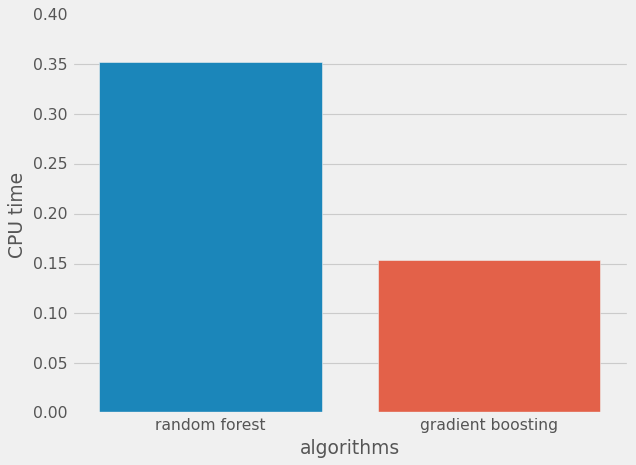

In [158]:
sns.barplot(x = 'algorithms', y= 'CPU time', data = df2)

### Comparaison des performances des méthodes 

Sklearn propose d'utiliser des métriques pour évaluer la performance des modèles proposées. 

In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import *

Ici, nous calculons avec la fonction mean_squared_error l'erreur quadratique de chacun de nos modèles. Nous constatons que ces deux valeurs de RMSE sont assez similaires mais que random forest semble un peu moins performant (avec une valeur plus élevé).

In [167]:
RMSE_rf = sqrt(mean_squared_error(y_test, mod_rf.predict(x_test)))
RMSE_GB = sqrt(mean_squared_error(y_test, mod_GB.predict(x_test)))

In [186]:
rmse = []
rmse.append((RMSE_rf, RMSE_GB))
df2 = pd.DataFrame(rmse,columns=['random forest', 'gradient boosting'])
df2 = df2.T
df2.columns = ['RMSE']
df2.index.name = 'algorithms'
df2.reset_index(inplace=True)

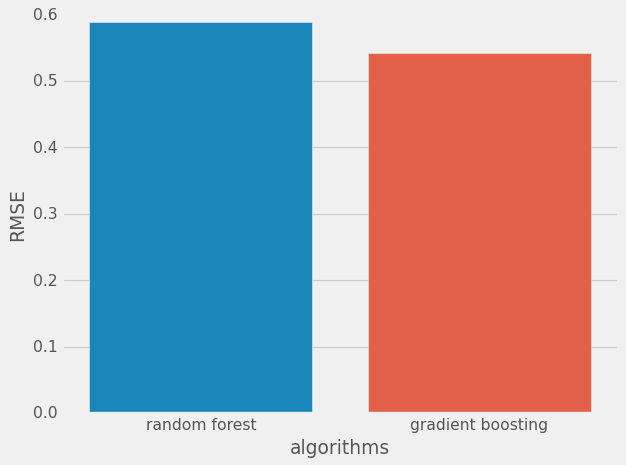

In [187]:
sns.barplot(x = 'algorithms', y= 'RMSE', data = df2)

Nous pouvons aussi comparer les R^2 de nos méthodes. Nous constatons que cette valeur est assez faible pour les deux méthodes. 

In [182]:
r2_rf = r2_score(y_test, mod_rf.predict(x_test))
r2_GB = r2_score(y_test, mod_GB.predict(x_test))

In [185]:
r2 = []
r2.append((r2_rf, r2_GB))
df2 = pd.DataFrame(r2,columns=['random forest', 'gradient boosting'])
df2 = df2.T
df2.columns = ['r2']
df2.index.name = 'algorithms'
df2.reset_index(inplace=True)

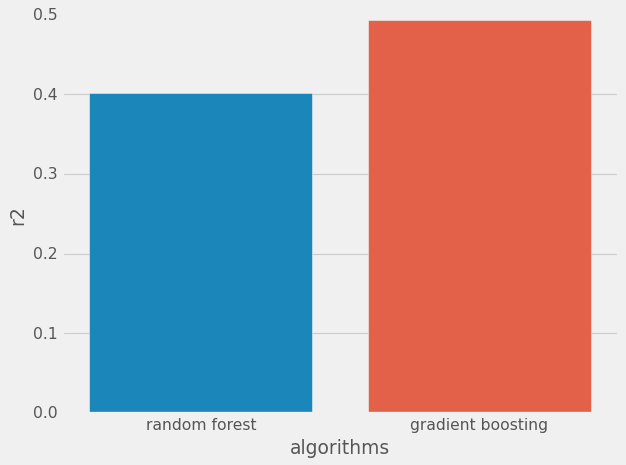

In [184]:
sns.barplot(x = 'algorithms', y= 'r2', data = df2)

### Classement des variables

L'intérêt des méthodes d'aggrégation du type random forest et gradient boosting réside aussi dans la notion d'importance de variables. En effet, on peut, en regardant quelles sont les variables utilisées dans la décision de chaque arbre de la forêt aléatoire, déterminer quelles sont les variables les plus utilisées par la forêt.  

Nous pouvons constater avec le classement (top 10) des variables les plus importantes que mêmes si les 2 méthodes ont des variables les plus importantes communes, il y a tout de même des différences. On peut aussi souligner que random forest accorde une importance prépondérante à une variable en particulier (fnsa3). Nous avons fait la même remarque avec la méthode rf de caret. Le gradient boosting réalise à peu près le même classement.
Et comme évoqué précédemment, ces différences sont dues au Feature selection, qui a notamment des effets sur l'ordre d'importance des variables explicatives.

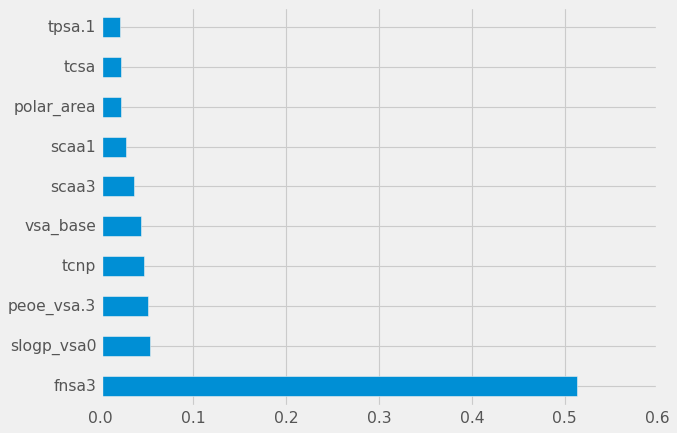

In [120]:
plt.style.use('fivethirtyeight')
feat_importances = pd.Series(mod_rf.feature_importances_, index=data_bbbDescr.columns)
feat_importances.nlargest(10).plot(kind='barh')

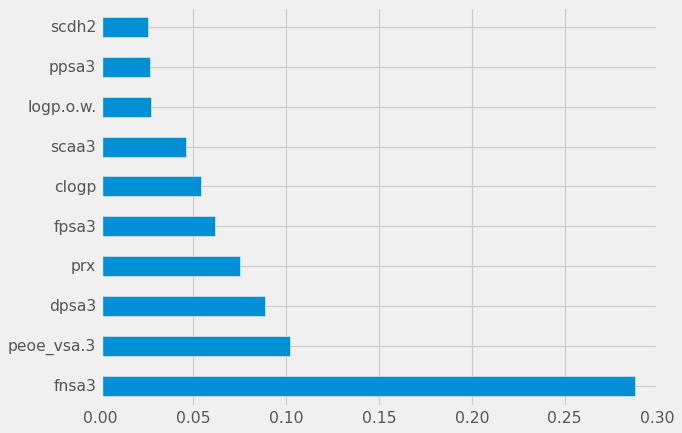

In [129]:
plt.style.use('fivethirtyeight')
feat_importances = pd.Series(mod_GB.feature_importances_, index=data_bbbDescr.columns)
feat_importances.nlargest(10).plot(kind='barh')